In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def step(x, w, ρ, m):
    x1, x2 = x
    w1, w2 = w
    ρ1, ρ2 = ρ
    m1, m2 = m
    
    xx1 = x1 * w1 / (x1 * w1 + 1 - x1)
    xx2 = x2 * w2 / (x2 * w2 + 1 - x2)
    
    xxx1 = ρ1 * xx1 + (1 - ρ1) * x1
    xxx2 = ρ2 * xx2 + (1 - ρ2) * x2
    
    xxxx1 = (1 - m1) * xxx1 + m2 * xxx2
    xxxx2 = (1 - m2) * xxx2 + m1 * xxx1
    
    return xxxx1, xxxx2

In [3]:
x = [0.5, 0.5]
w = [2., 0.5]
ρ = [0.1, 0.2]
m = [.1] * 2

In [4]:
x = step(x, w, ρ, m)
x

(0.5116666666666667, 0.47166666666666673)

In [25]:
def equil(x, w, ρ, m, err=1e-4):
    x_ = (-1, -1)
    while abs(x[0]/x_[0]-1) + abs(x[1]/x_[1]-1) > err:
        x_ = x
        x = step(x, w, ρ, m)
    return x

def mf(x, w):
    x1, x2 = x
    w1, w2 = w
    return (1-x1+x1*w1)/np.maximum(w1, 1), (1-x2+x2*w2)/np.maximum(w2, 1)

def solution(w, ρ, m):
    Δ = np.sqrt(m**2*(w+1)**2 + (w-1)**2*(1-2*m))
    return (w-1-m*(w+1)+Δ)/(2*(w-1)), (w-1+m*(w+1)-Δ)/(2*(w-1))

In [10]:
x = [0.5, 0.5]
w = [2., 0.5]
ρ = [0.9, 0.8]
m = [0.1] * 2
x = equil(x, w, ρ, m)
mf(x, w)
# x

(0.9070268439073018, 0.8933866189557248)

In [58]:
x = [0.5, 0.5]
w = [2., 1/2.]
ρ = [0.9, 0.5]
m = [0.1] * 2

ms = np.logspace(-4, -0.3, 200)
xstar = np.array([
    equil(x, w, ρ, (m, m))
    for m in ms
])

In [59]:
w, ρ, m

([2.0, 0.5], [0.9, 0.5], [0.1, 0.1])

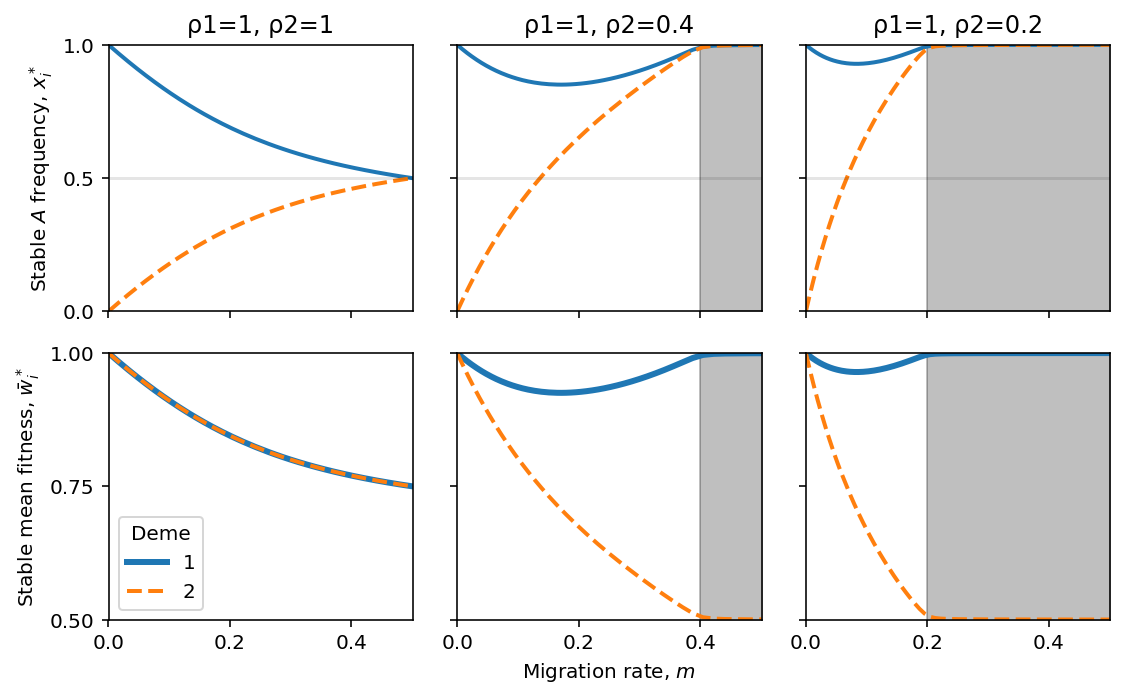

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey='row')

for j, ρ in enumerate([(1,1), (1, 0.4), (1, 0.2)]):
    xstar = np.array([
        equil(x, w, ρ, (m, m))
        for m in ms
    ])
    xsol = np.array([ # analytic solution
        solution(w[0], 1, m)
        for m in ms
    ])

    ax = axes[0,j]
    lines = ax.plot(ms, xstar, lw=2)
    lines[1].set_linestyle('--')
#     lines_sol = ax.plot(ms, xsol, lw=1, ls='--', alpha=0.5)
#     for line1, line2 in zip(lines, lines_sol):
#         line2.set_color(line1.get_color())
    ax.fill_between([((w[0]-1)*ρ[1])/((w[0]-1)*ρ[1]+1-ρ[1]), 1], [1, 1], alpha=0.25, color='k')
    if j == 0:
        ax.set(        
            ylabel=('Stable $A$ frequency, $x_i^*$'),
            ylim=(0, 1),
            yticks=[0, 0.5, 1],
            xlim=(ms.min(), ms.max()),
        )
    ax.set_title('ρ1={}, ρ2={}'.format(*ρ))
    ax.axhline(0.5, ls='-', color='k', alpha=0.1)

    ax = axes[1,j]
    mf1, mf2 = mf(xstar.T, w)
    ax.plot(ms, mf1, lw=3)
    ax.plot(ms, mf2, ls='--', lw=2)  
    ax.fill_between([((w[0]-1)*ρ[1])/((w[0]-1)*ρ[1]+1-ρ[1]), 1], [1, 1], alpha=0.25, color='k')
    if j == 0:
        ax.set(        
            ylabel=(r'Stable mean fitness, $\bar{w}^*_i$'),
            ylim=(0.5, 1),
            yticks=[0.5, 0.75, 1],
            xlim=(ms.min(), ms.max())
        )
        ax.legend([r'1', r'2'], title='Deme', loc='lower left')
    if j == 1: ax.set_xlabel('Migration rate, $m$')
fig.tight_layout()
fig.savefig('../figures/migration_m.pdf', dpi=300)

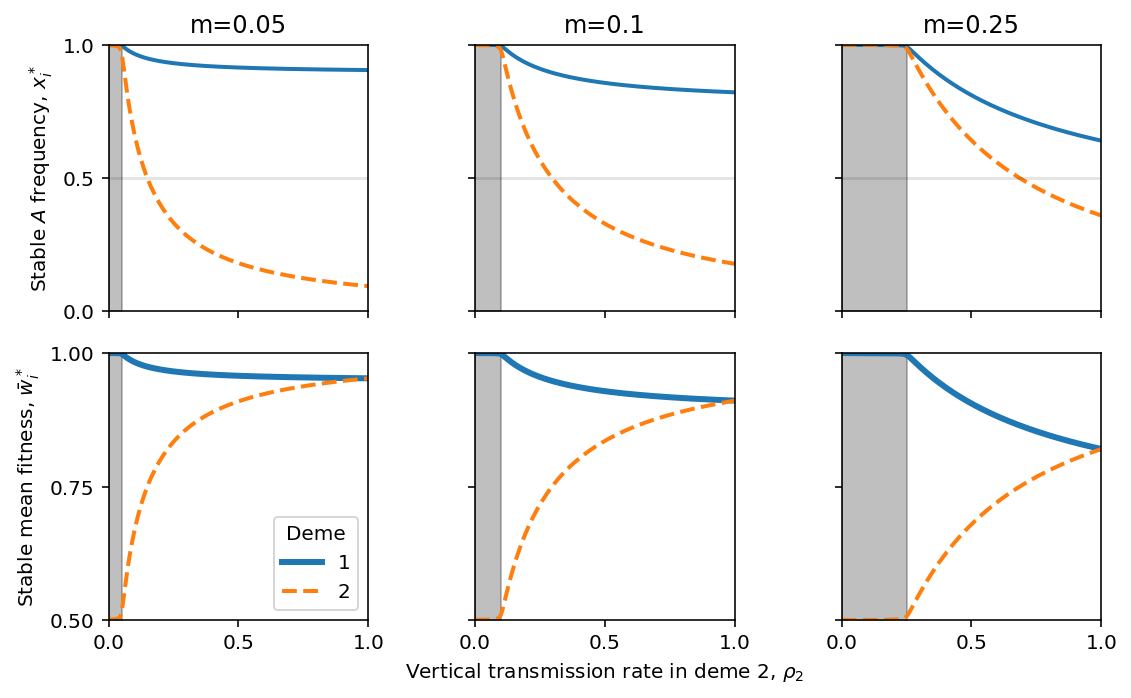

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey='row')
ρ = np.linspace(0, 1, 500)

for j, m in enumerate([0.05, 0.1, 0.25]):
    xstar = np.array([
        equil(x, w, (1, ρ_), (m, m))
        for ρ_ in ρ
    ])

    ax = axes[0,j]
    lines = ax.plot(ρ, xstar, lw=2)
    lines[1].set_linestyle('--')
    ax.fill_between([0, m / (m + (1 - m)*(w[0]-1)),], [1, 1], alpha=0.25, color='k')
    if j == 0:
        ax.set(        
            ylabel=('Stable $A$ frequency, $x_i^*$'),
            ylim=(0, 1),
            yticks=[0, 0.5, 1],
            xlim=(ρ.min(), ρ.max()),
        )
    ax.set_title('m={}'.format(m))
    ax.axhline(0.5, ls='-', color='k', alpha=0.1)

    ax = axes[1,j]
    mf1, mf2 = mf(xstar.T, w)
    ax.plot(ρ, mf1, lw=3)
    ax.plot(ρ, mf2, ls='--', lw=2)  
    ax.fill_between([0, m / (m + (1 - m)*(w[0]-1)),], [1, 1], alpha=0.25, color='k')
    if j == 0:
        ax.set(        
            ylabel=(r'Stable mean fitness, $\bar{w}^*_i$'),
            ylim=(mf2.min(), 1),
            yticks=[0.5, 0.75, 1],
            xlim=(ρ.min(), ρ.max()),
            xticks=[0, 0.5, 1]
        )
        ax.legend([r'1', r'2'], title='Deme', loc='lower right')
    if j == 1: ax.set_xlabel(r'Vertical transmission rate in deme 2, $\rho_2$')
fig.tight_layout()
fig.savefig('../figures/migration_rho.pdf', dpi=300)